In [2]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import pandas as pd
from pfca.exp import viz_dimensional, generate_colormap

In [3]:
#Load the datasets
X = np.load('./dataset/data_matrix_trimmed_equal.npy')
Y = np.load('./dataset/labels_trimmed_equal.npy')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, stratify = Y)

In [6]:
print("No of train samples: ", len(x_train))
print("No of test samples: ", len(x_test))

No of train samples:  672
No of test samples:  288


In [7]:
rusboost = RUSBoostClassifier(n_estimators = 100, random_state=10)

In [8]:
rusboost.fit(x_train, y_train)

RUSBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=10, replacement=False,
                   sampling_strategy='auto')

In [12]:
#Running on test dataset
y_pred = rusboost.predict(x_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", (accuracy*100))

Test Accuracy:  67.70833333333334


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       144
           1       0.69      0.74      0.71       144

    accuracy                           0.70       288
   macro avg       0.71      0.70      0.70       288
weighted avg       0.71      0.70      0.70       288



In [46]:
print(confusion_matrix(y_test, y_pred))

[[ 97  47]
 [ 38 106]]


In [47]:
y_pred_train = rusboost.predict(x_train)

In [49]:
accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy: ", (accuracy*100))

Train Accuracy:  75.44642857142857


In [53]:
n_positive = np.sum(y_test)

In [55]:
print("Positive class Accuracy: ",(106/n_positive))

Positive class Accuracy:  0.7361111111111112


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test, pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [4]:
#Dimensional Reduction
pos = []
neg = []
for i in range(X.shape[0]):
    if Y[i] == 0:
        neg.append(X[i,:])
    elif Y[i] == 1:
        pos.append(X[i,:])

In [5]:
pos = np.array(pos)
neg = np.array(neg)

In [6]:
pos.shape

(480, 27)

In [7]:
colormap, labels = generate_colormap(pos, 'Mulberry miRNA', color = [0,1,0])

In [8]:
clrmaps, lbls = generate_colormap(neg, 'Non-mulberry miRNA', color = [1,0,0], 
                                  c_matrix = colormap, l_matrix = labels)

In [9]:
feat = np.vstack((pos,neg))

(960, 2)


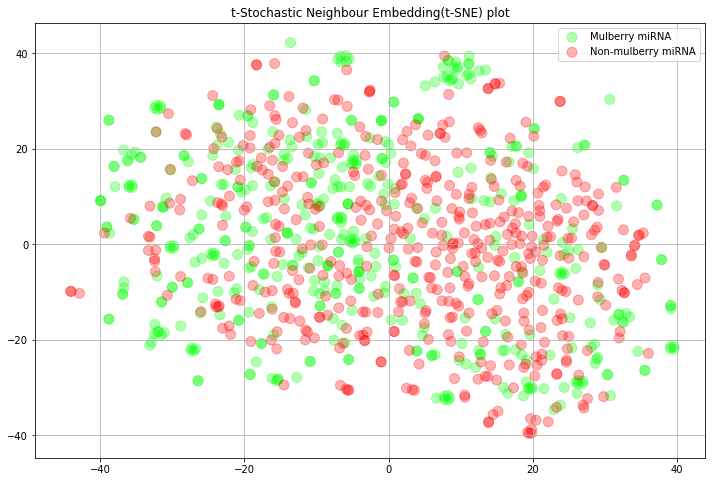

In [12]:
tsne_vec = viz_dimensional(feat, algo = 'tsne', colormap=clrmaps, labelmap=lbls)

(960, 27)